In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numba import jit, prange
np.random.seed(1234)

In [2]:
@jit("int8(int16)", nopython=True)
def play(n):
    for i in range(n - 1, 1, -1):
        new = np.random.randint(0, i)
        if new == i - 1:
            return 1
        elif new == 0:
            return 0
    return 0

In [3]:
@jit("float32(int16,int32)")
def play_n(n, b):
    running_sum = 0
    running_num = 0
    for _ in prange(b):
        running_sum = running_sum + play(n)
        running_num += 1
    return float(running_sum / running_num)

In [4]:
result = {i: play_n(i, 10_000) for i in range(2, 100)}
df = pd.DataFrame({'experimental': pd.Series(result)})
df.head()

,experimental
2,0.0000
3,0.5023
4,0.4970
5,0.5038
6,0.4984


In [5]:
df['theoretical'] = pd.Series({k: 1/2 if k > 2 else 0 for k in df.index})

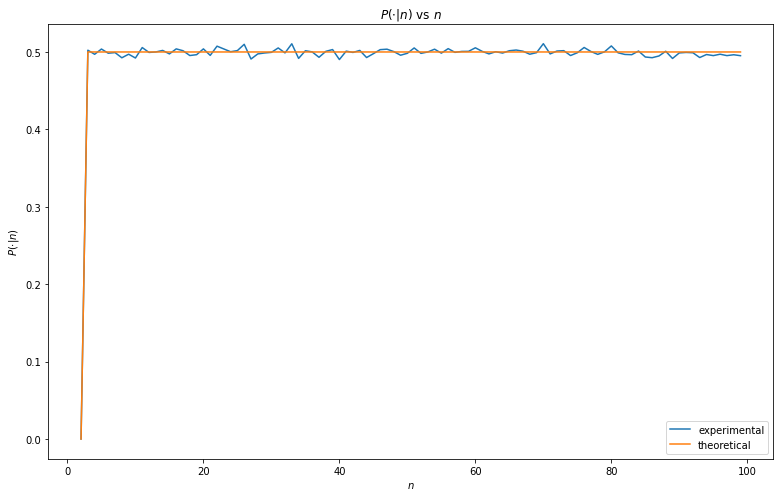

In [6]:
plt.figure(figsize=(13,8))
df.plot(ax=plt.gca(), title='$P(\cdot | n)$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$P(\cdot | n)$');